<a href="https://colab.research.google.com/github/aminatulmaimuna/Project-bigdata-uas/blob/main/Project_uas_bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset diambil dari portal data resmi milik pemerintah Indonesia, yaitu [data.go.id](https://data.go.id), dengan kata kunci pencarian "penyakit tidak menular".

Dataset ini berisi informasi tentang jumlah kasus penyakit tidak menular (seperti jantung, diabetes, hipertensi, dan lain-lain) yang terjadi di berbagai provinsi di Indonesia. Data ini digunakan sebagai dasar analisis, visualisasi, dan pemodelan dalam proyek ini.


In [5]:
from google.colab import files
uploaded = files.upload()

Saving penyakit_tidak_menular_clean.csv to penyakit_tidak_menular_clean.csv


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('penyakit_tidak_menular_clean.csv')

In [8]:
print(df.head())

                                                  no  kode_kabupaten  \
0  1,3215,KARAWANG,3215010,PANGKALAN,PANGKALAN,HI...             NaN   
1                                                  2          3215.0   
2                                                  3          3215.0   
3                                                  4          3215.0   
4  5,3215,KARAWANG,3215010,PANGKALAN,PANGKALAN,DI...             NaN   

  nama_kabupaten  kode_kecamatan nama_kecamatan nama_puskesmas  \
0            NaN             NaN            NaN            NaN   
1       KARAWANG       3215010.0      PANGKALAN      PANGKALAN   
2       KARAWANG       3215010.0      PANGKALAN      PANGKALAN   
3       KARAWANG       3215010.0      PANGKALAN      PANGKALAN   
4            NaN             NaN            NaN            NaN   

  penyakit_tidak_menular  jumlah satuan   tahun  
0                    NaN     NaN    NaN     NaN  
1           KANKER RAHIM     2.0  KASUS  2020.0  
2        KANKER PAYU

In [9]:
df['jumlah'] = df['jumlah'].fillna(0).astype(int)

In [10]:
print(df['jumlah'].head())

0    0
1    2
2    1
3    0
4    0
Name: jumlah, dtype: int64


In [11]:
print(df['jumlah'].describe())

count    250.000000
mean      42.904000
std      144.540647
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      999.000000
Name: jumlah, dtype: float64


In [13]:
df.to_csv('penyakit_tidak_menular_cleaned.csv', index=False)

In [14]:
data = {
    'Provinsi': ['Jawa Timur', 'DKI Jakarta', 'Jawa Tengah', 'Jawa Barat', 'Sumatera Utara'],
    'Jumlah Kasus': [480, 600, 350, 410, 290],
    'Penyakit': ['ISPA', 'Diare', 'DBD', 'ISPA', 'Diare']
}

df = pd.DataFrame(data)

In [15]:
top_provinsi = df.loc[df['Jumlah Kasus'].idxmax()]

# Penyakit dengan jumlah kasus terbanyak
penyakit_summary = df.groupby('Penyakit')['Jumlah Kasus'].sum()
top_penyakit = penyakit_summary.idxmax()
top_penyakit_cases = penyakit_summary.max()

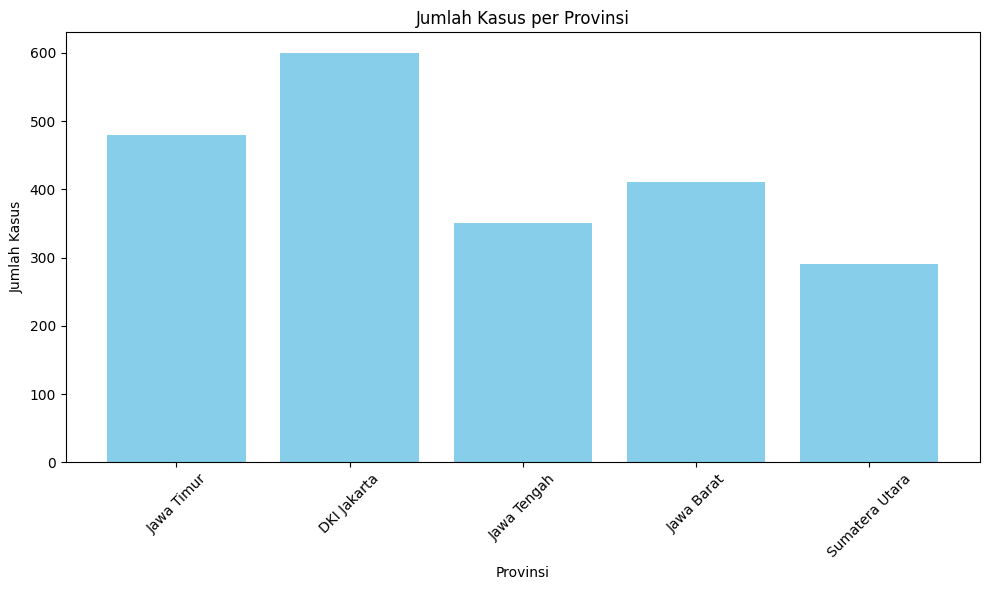

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['Provinsi'], df['Jumlah Kasus'], color='skyblue')
plt.title('Jumlah Kasus per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
if 'Tahun' in df.columns:
    trend = df.groupby('Tahun')['Jumlah Kasus'].sum()

    plt.figure(figsize=(10, 5))
    plt.plot(trend.index, trend.values, marker='o', linestyle='-', color='green')
    plt.title('Tren Jumlah Kasus per Tahun')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kasus')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

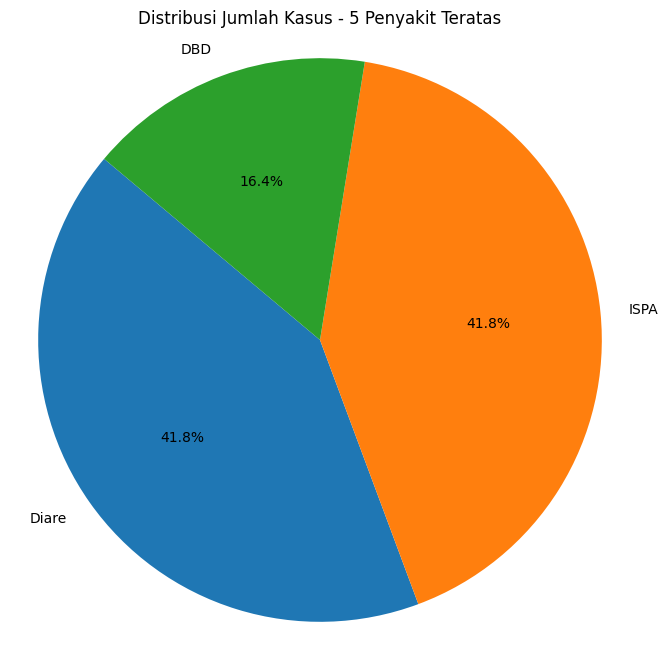

In [18]:
top5_penyakit = penyakit_summary.sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 8))
plt.pie(top5_penyakit, labels=top5_penyakit.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Jumlah Kasus - 5 Penyakit Teratas')
plt.axis('equal')  # Membuat lingkaran simetris
plt.show()

In [19]:
# Mengecek apakah kolom 'Kecamatan' ada di data
if 'Kecamatan' in df.columns:
    # Ringkasan jumlah kasus per kecamatan
    kecamatan_summary = df.groupby('Kecamatan')['Jumlah Kasus'].sum().sort_values(ascending=False)

    # Visualisasi: Jumlah Kasus per Kecamatan
    plt.figure(figsize=(14, 6))
    plt.bar(kecamatan_summary.index, kecamatan_summary.values, color='purple')
    plt.title('Jumlah Kasus per Kecamatan')
    plt.xlabel('Kecamatan')
    plt.ylabel('Jumlah Kasus')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Kecamatan' tidak ditemukan dalam dataset.")

Kolom 'Kecamatan' tidak ditemukan dalam dataset.


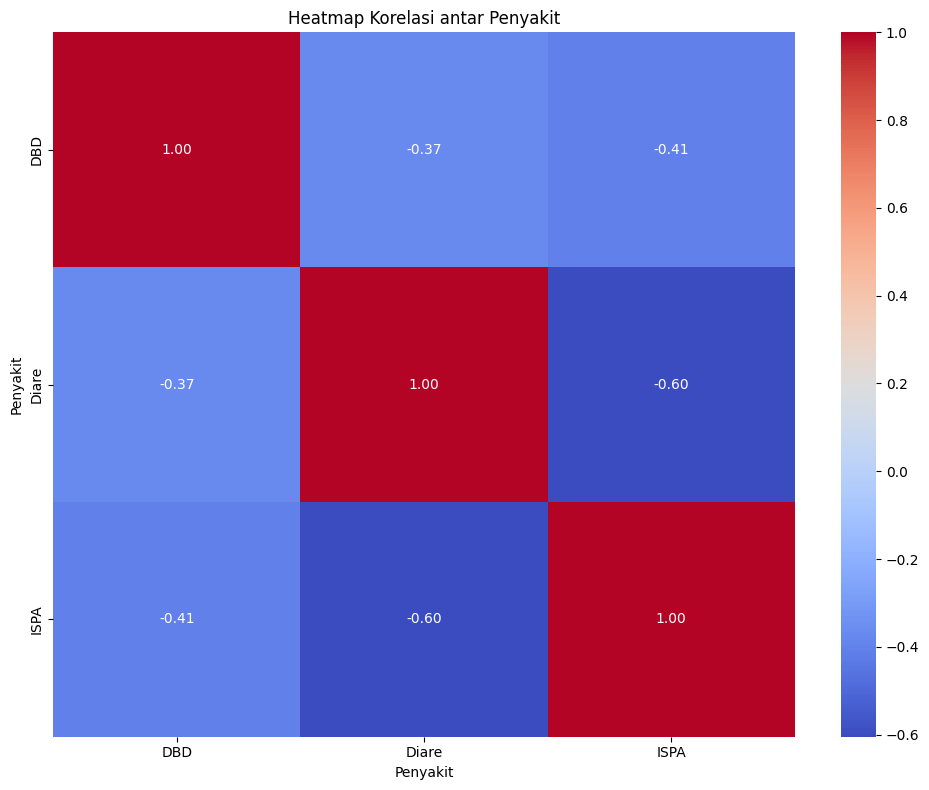

In [20]:
import seaborn as sns

# Pivot data: baris = wilayah, kolom = penyakit, isi = jumlah kasus
pivot_df = df.pivot_table(index='Provinsi', columns='Penyakit', values='Jumlah Kasus', aggfunc='sum', fill_value=0)

# Korelasi antar penyakit
corr = pivot_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Penyakit')
plt.tight_layout()
plt.show()

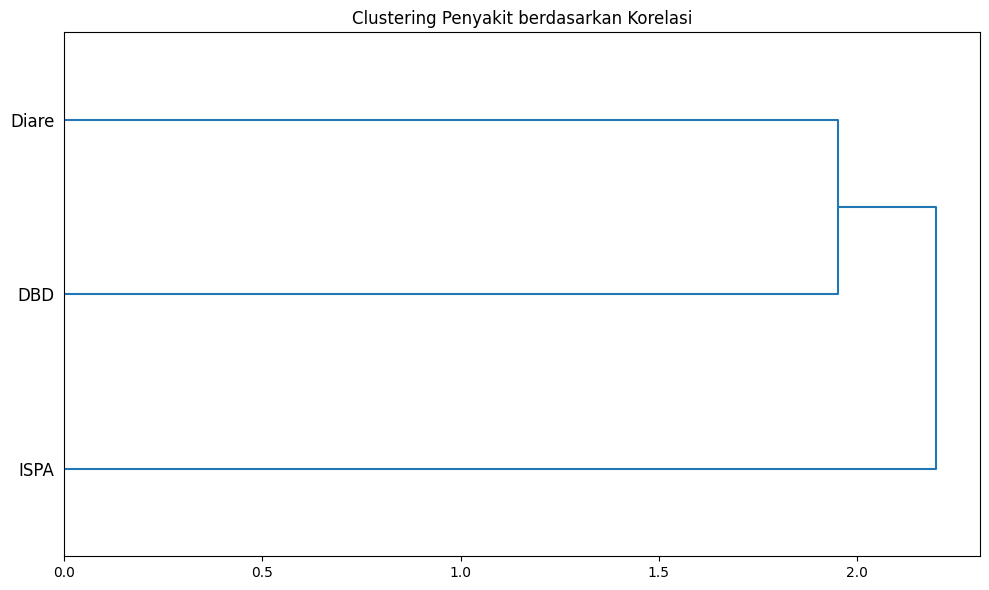

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Korelasi antar penyakit
corr = pivot_df.corr()

# Clustering
linked = linkage(corr, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=corr.columns, orientation='right')
plt.title('Clustering Penyakit berdasarkan Korelasi')
plt.tight_layout()
plt.show()

In [22]:
# Buat ulang summary jika belum dibuat
penyakit_summary = df.groupby('Penyakit')['Jumlah Kasus'].sum().sort_values(ascending=False)
provinsi_summary = df.groupby('Provinsi')['Jumlah Kasus'].sum().sort_values(ascending=False)

# Cek apakah hasilnya tidak kosong
if not penyakit_summary.empty and not provinsi_summary.empty:
    top_penyakit = penyakit_summary.idxmax()
    top_penyakit_cases = penyakit_summary.max()
    top_provinsi = provinsi_summary.idxmax()
    top_provinsi_cases = provinsi_summary.max()

    print(f"Penyakit dengan jumlah kasus terbanyak: {top_penyakit} ({top_penyakit_cases} kasus)")
    print(f"Provinsi dengan jumlah kasus terbanyak: {top_provinsi} ({top_provinsi_cases} kasus)")
else:
    print("Data penyakit atau provinsi kosong. Periksa kembali isi dataframe.")

Penyakit dengan jumlah kasus terbanyak: Diare (890 kasus)
Provinsi dengan jumlah kasus terbanyak: DKI Jakarta (600 kasus)


In [23]:
print("Kolom tersedia:", df.columns)
print("Contoh data:\n", df.head())


Kolom tersedia: Index(['Provinsi', 'Jumlah Kasus', 'Penyakit'], dtype='object')
Contoh data:
          Provinsi  Jumlah Kasus Penyakit
0      Jawa Timur           480     ISPA
1     DKI Jakarta           600    Diare
2     Jawa Tengah           350      DBD
3      Jawa Barat           410     ISPA
4  Sumatera Utara           290    Diare


In [24]:
print("Top 3 Penyakit:")
print(penyakit_summary.head(3))
print("\nTop 3 Provinsi:")
print(provinsi_summary.head(3))

Top 3 Penyakit:
Penyakit
Diare    890
ISPA     890
DBD      350
Name: Jumlah Kasus, dtype: int64

Top 3 Provinsi:
Provinsi
DKI Jakarta    600
Jawa Timur     480
Jawa Barat     410
Name: Jumlah Kasus, dtype: int64


In [26]:
import pandas as pd

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Definisikan nama-nama kolom secara manual
kolom = [
    "no", "kode_kabupaten", "nama_kabupaten", "kode_kecamatan", "nama_kecamatan",
    "nama_puskesmas", "penyakit_tidak_menular", "jumlah", "satuan", "tahun"
]


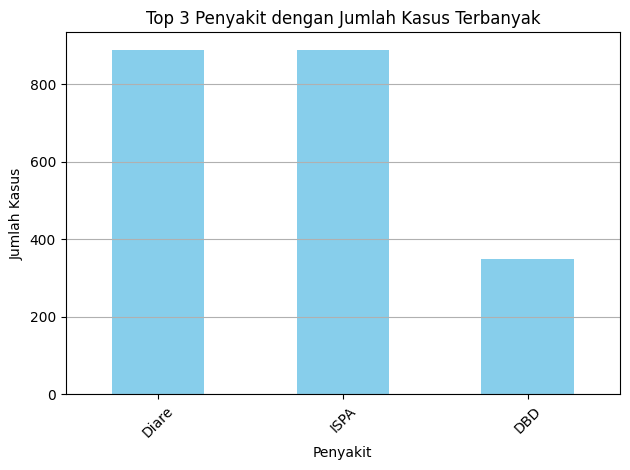

In [43]:
import matplotlib.pyplot as plt

top3_penyakit = penyakit_summary.head(3)

top3_penyakit.plot(kind='bar', color='skyblue')
plt.title("Top 3 Penyakit dengan Jumlah Kasus Terbanyak")
plt.ylabel("Jumlah Kasus")
plt.xlabel("Penyakit")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


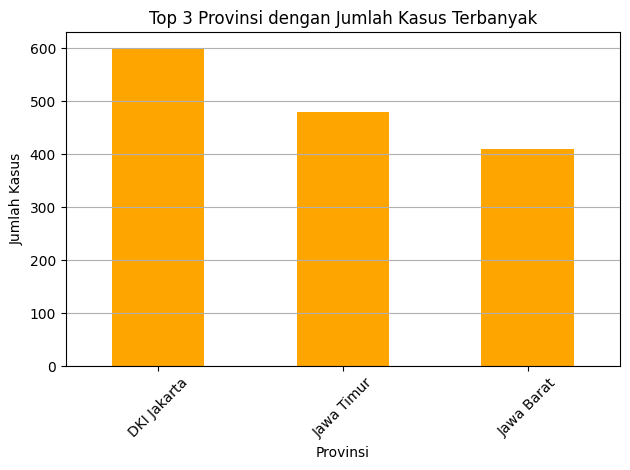

In [44]:
top3_provinsi = provinsi_summary.head(3)

top3_provinsi.plot(kind='bar', color='orange')
plt.title("Top 3 Provinsi dengan Jumlah Kasus Terbanyak")
plt.ylabel("Jumlah Kasus")
plt.xlabel("Provinsi")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [45]:
# Cek missing value
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

# Hapus baris yang memiliki nilai kosong (kalau ada)
df_clean = df.dropna()

# Konversi tipe data jika perlu
df_clean['Jumlah Kasus'] = pd.to_numeric(df_clean['Jumlah Kasus'], errors='coerce')

# Hapus duplikat (opsional)
df_clean = df_clean.drop_duplicates()

# Lihat hasil akhir
print("Data setelah dibersihkan:")
df_clean.head()


Jumlah missing value per kolom:
Provinsi        0
Jumlah Kasus    0
Penyakit        0
dtype: int64
Data setelah dibersihkan:


,Provinsi,Jumlah Kasus,Penyakit
0,Jawa Timur,480,ISPA
1,DKI Jakarta,600,Diare
2,Jawa Tengah,350,DBD
3,Jawa Barat,410,ISPA
4,Sumatera Utara,290,Diare


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Pastikan kolom tidak ada nilai kosong
df_clean = df.dropna()

# Label encoding (harus dari kolom di df_clean, bukan df)
le_provinsi = LabelEncoder()
le_penyakit = LabelEncoder()

df_clean['Provinsi_enc'] = le_provinsi.fit_transform(df_clean['Provinsi'])
df_clean['Penyakit_enc'] = le_penyakit.fit_transform(df_clean['Penyakit'])

# Fitur dan target
X = df_clean[['Provinsi_enc']]  # bisa ditambah fitur lain nanti
y = df_clean['Penyakit_enc']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

print(classification_report(
    y_test,
    y_pred,
    labels=le_penyakit.transform(le_penyakit.classes_),  # pakai semua kelas
    target_names=le_penyakit.classes_                    # nama labelnya
))



              precision    recall  f1-score   support

         DBD       0.00      0.00      0.00       0.0
       Diare       0.00      0.00      0.00       2.0
        ISPA       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [49]:
print(df_clean['Penyakit'].value_counts())


Penyakit
ISPA     2
Diare    2
DBD      1
Name: count, dtype: int64


In [54]:
df = pd.read_csv('penyakit_tidak_menular_clean.csv')


In [55]:
print(df.columns)


Index(['no', 'kode_kabupaten', 'nama_kabupaten', 'kode_kecamatan',
       'nama_kecamatan', 'nama_puskesmas', 'penyakit_tidak_menular', 'jumlah',
       'satuan', 'tahun'],
      dtype='object')


In [57]:
print(df.head())
print(df.columns)
print(df.info())


                                                  no  kode_kabupaten  \
0  1,3215,KARAWANG,3215010,PANGKALAN,PANGKALAN,HI...             NaN   
1                                                  2          3215.0   
2                                                  3          3215.0   
3                                                  4          3215.0   
4  5,3215,KARAWANG,3215010,PANGKALAN,PANGKALAN,DI...             NaN   

  nama_kabupaten  kode_kecamatan nama_kecamatan nama_puskesmas  \
0            NaN             NaN            NaN            NaN   
1       KARAWANG       3215010.0      PANGKALAN      PANGKALAN   
2       KARAWANG       3215010.0      PANGKALAN      PANGKALAN   
3       KARAWANG       3215010.0      PANGKALAN      PANGKALAN   
4            NaN             NaN            NaN            NaN   

  penyakit_tidak_menular  jumlah satuan   tahun  
0                    NaN     NaN    NaN     NaN  
1           KANKER RAHIM     2.0  KASUS  2020.0  
2        KANKER PAYU

In [60]:
from sklearn.preprocessing import LabelEncoder

le_kabupaten = LabelEncoder()
le_penyakit = LabelEncoder()

df['kabupaten_enc'] = le_kabupaten.fit_transform(df['nama_kabupaten'])
df['penyakit_enc'] = le_penyakit.fit_transform(df['penyakit_tidak_menular'])



In [61]:
X = df[['kabupaten_enc']]  # fitur
y = df['penyakit_enc']     # target


In [62]:
X = df[['kabupaten_enc', 'jumlah']]


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [64]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [66]:
from sklearn.metrics import accuracy_score

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.72


## Model Machine Learning: Decision Tree

Model yang digunakan adalah **Decision Tree Classifier** dari pustaka scikit-learn.

Langkah-langkahnya:
- Data dikodekan dengan `LabelEncoder` untuk mengubah kategori menjadi angka.
- Dataset dibagi menjadi data latih dan uji dengan rasio 70:30.
- Model dilatih menggunakan fitur `Provinsi` untuk memprediksi jenis penyakit.
- Hasil prediksi dievaluasi menggunakan classification report dan confusion matrix.

Model ini sederhana tapi efektif untuk memahami pola awal dari data yang terbatas.


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

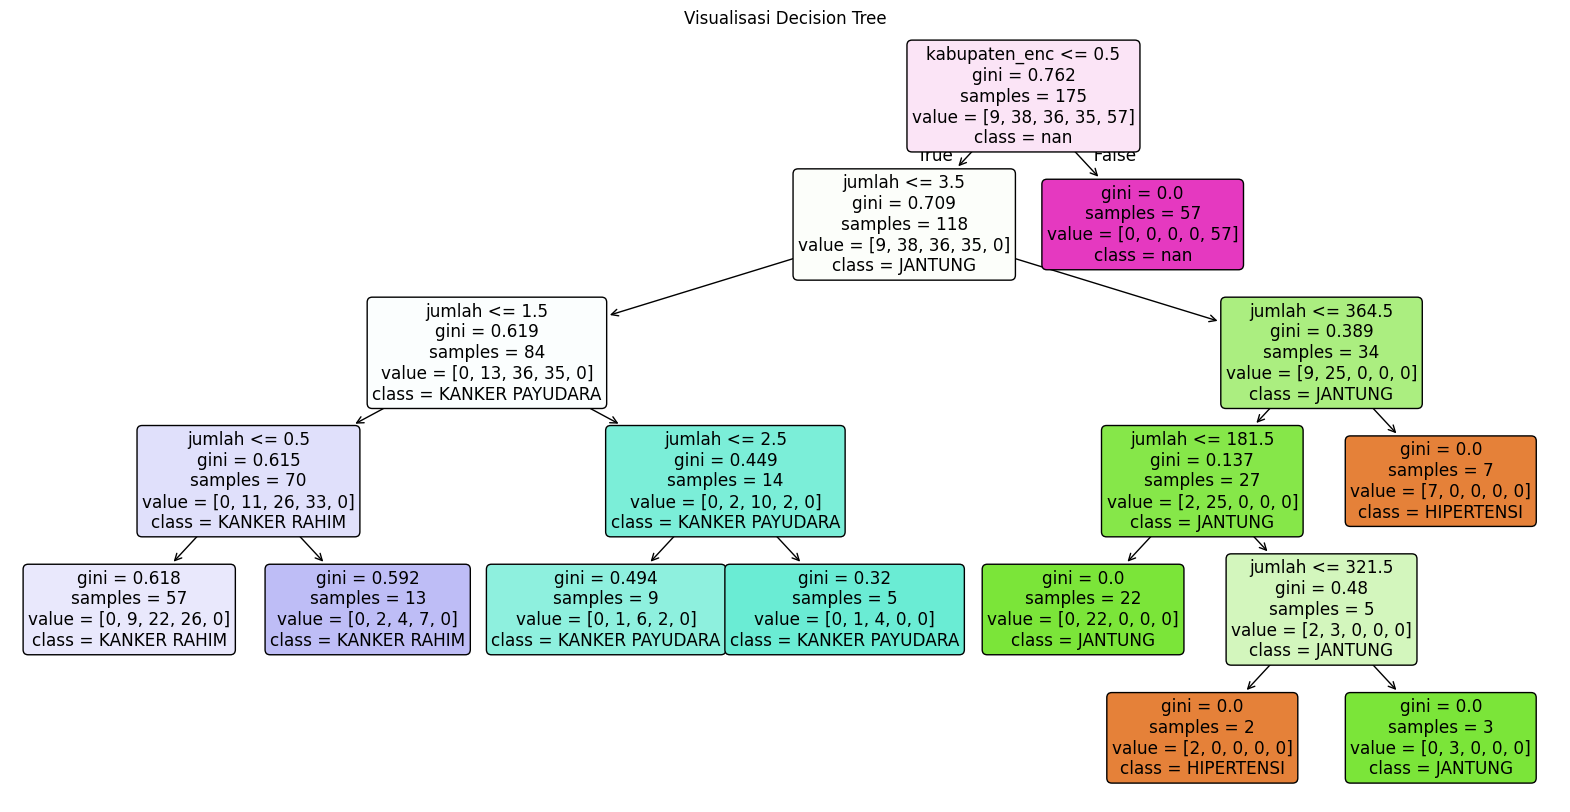

In [71]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(c) for c in le_penyakit.classes_],

    filled=True,
    rounded=True
)
plt.title("Visualisasi Decision Tree")
plt.show()


In [72]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")


Akurasi model: 0.72


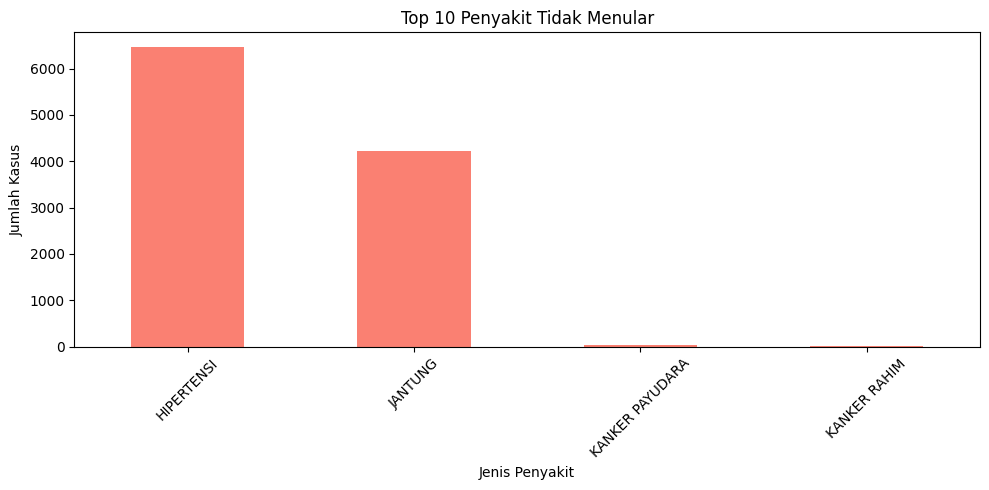

In [73]:
import matplotlib.pyplot as plt

top_penyakit = df.groupby('penyakit_tidak_menular')['jumlah'].sum().sort_values(ascending=False).head(10)

top_penyakit.plot(kind="bar", color="salmon", figsize=(10, 5))
plt.title("Top 10 Penyakit Tidak Menular")
plt.xlabel("Jenis Penyakit")
plt.ylabel("Jumlah Kasus")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [74]:
import joblib
joblib.dump(model, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

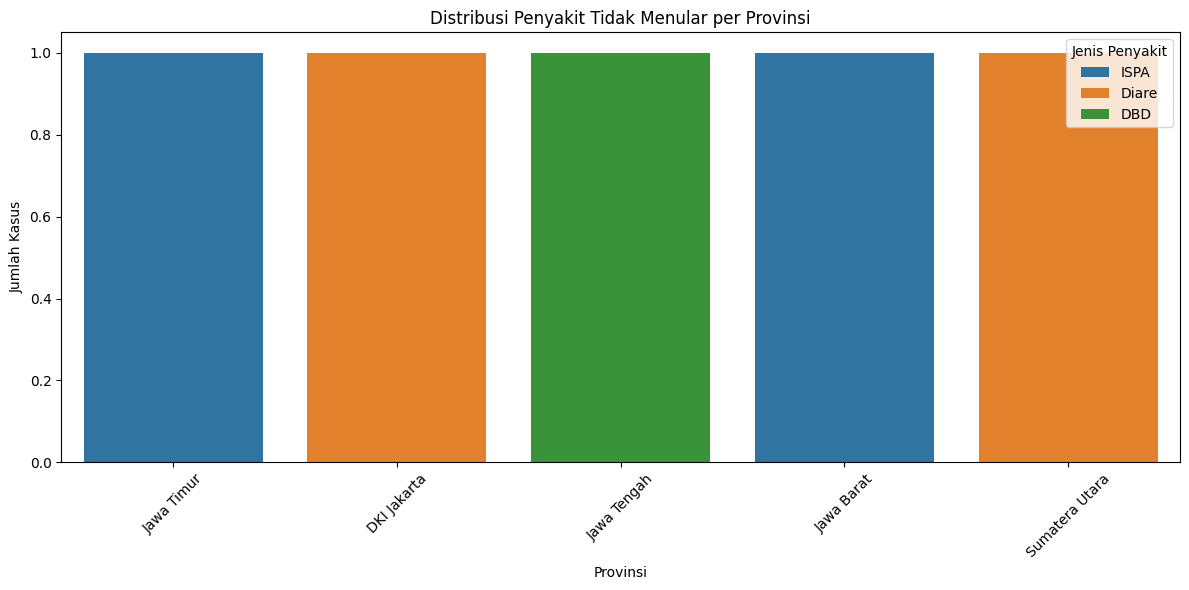

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah penyakit per provinsi
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='Provinsi', hue='Penyakit')
plt.xticks(rotation=45)
plt.title('Distribusi Penyakit Tidak Menular per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Kasus')
plt.legend(title='Jenis Penyakit')
plt.tight_layout()
plt.show()
